In [1]:
import numpy as np

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [5]:
mnist


_Datasets(train=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x000001721347EF88>, validation=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x00000172134F03C8>, test=<tensorflow.examples.tutorials.mnist.input_data._DataSet object at 0x00000172134F0548>)

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [8]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
mnist.validation.images.shape

(5000, 784)

In [10]:
import numpy as np
from matplotlib import pyplot as plt

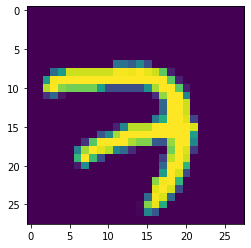

In [11]:
#plot the images
first_image=mnist.train.images[0]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)

In [12]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10


In [13]:
#randomly assigning weights
#it requires shape in square bracket
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_1,n_classes])),
    
}

biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
    
}


In [14]:
def forward_propagation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output
    
    

In [16]:
#argmax takes two value-- second denotes the axis
# sess=tf.Session()
# sess.run(tf.global_variables_initializer())
x=tf.placeholder("float",[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)


In [17]:
# predictions=tf.argmax(pred,1)
# true_labels=tf.argmax(y,1)
# correct_predictions=tf.equal(predictions,true_labels)


In [18]:

# predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
# predictions_eval,labels,correct_pred

(array([8, 8, 8, ..., 8, 8, 8], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [19]:
# correct_pred.sum()

938

In [20]:
# calculating cost

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [33]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

23517.08873796463
4377.80434458144
2386.3086081734564
1488.3837122864566
1149.018684368446
1031.9454977882897
866.0133422829776
809.6194161527594
683.2144942272691
610.338485593873
511.8814666943478
431.2821309695064
483.49200311975517
368.537631245365
304.4401674102521
312.72376756756154
304.8615454006391
253.5286022954526
239.03913722363924
192.79315799942822
174.29657300082718
150.7701507017233
181.7349414068719
161.10122243099613
94.32131947549351


In [36]:
predictions=tf.argmax(pred,1)
correct_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,correct_labels)
predictions,correct_predictions=sess.run([predictions,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_predictions.sum()


9498